In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.io
import sklearn.datasets
from reg_utils import sigmoid,relu,plot_decision_boundary,initialize_parameters,load_2D_dataset,predict_dec
from reg_utils import compute_cost,predict,forward_propagation,backward_propagation,update_parameters
from testCases import *


plt.rcParams['figure.figsize']=(7.0,4.0) #set default size of plots
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'

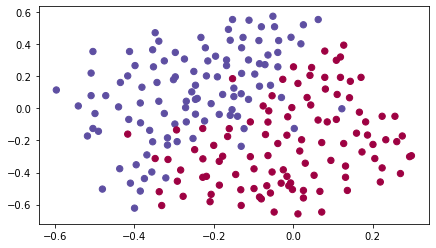

In [2]:
train_X,train_Y,test_X,test_Y=load_2D_dataset()

In [3]:
def model(X,Y,learning_rate=0.3,num_iterations=30000,print_cost=True,lambd=0,keep_prob=1):
    'LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.'
    
    grads= {}
    costs= []
    m=X.shape[1]
    layer_dims=[X.shape[0],20,3,1]
    
    parameters=initialize_parameters(layer_dims)
    
    
    for i in range(0,num_iterations):
        if keep_prob==1:
            a3,cache=forward_propagation(X,parameters)
        elif keep_prob<1:  #dropout shutdown
            a3,cache=forward_propagation_with_dropout(X,parameters,keep_prob)
            
        #compute cost
    
        if lambd==0:
            cost=compute_cost(a3,Y)
        else:
            cost=compute_cost_with_regularization(a3,Y,parameters,lambd)
            
        
        if lambd==0 and keep_prob==1:
            grads=backward_propagation(X,Y,cache)
        
        elif lambd!=0:
            grads=backward_propagation_with_regularization(X,Y,cache,lambd)
        elif keep_prob<1:
            grads=backward_propagation_with_dropout(X,Y,cache,keep_prob)
            
        parameters=update_parameters(parameters,grads,learning_rate)
    
        if print_cost and i % 10000 == 0:
            print('cost after iteration {}:{}'.format(i,cost))
        
        if print_cost and i % 1000 == 0:
            costs.append(cost)
        
#plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations(x1,000)')
    plt.title('Learning rate='+str(learning_rate))
    plt.show()
    
    return parameters

- 3layer NN with dropout 
- LINEAR->RELU+DROPOUT->LINEAR->RELU+DROPOUT->LINEAR->SIGMOID

In [8]:
def forward_propagation_with_dropout(X,parameters,keep_prob=0.5):
    np.random.seed(1)
    
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    W3=parameters['W3']
    b3=parameters['b3']
    
    Z1=np.dot(W1,X)+b1
    A1=relu(Z1)
    D1=np.random.rand(A1.shape[0],A1.shape[1])
    D1=(D1<keep_prob)
    A1=A1*D1
    A1=A1/keep_prob
    
    Z2=np.dot(W2,A1)+b2
    A2=relu(Z2)
    D2=np.random.rand(A2.shape[0],A2.shape[1])
    D2=(D2<keep_prob)
    A2=A2*D2
    A2=A2/keep_prob
    
    Z3=np.dot(W3,A2)+b3
    A3=sigmoid(Z3)
    
    cache=(Z1,D1,A1,W1,b1,Z2,D2,A2,W2,b2,Z3,A3,W3,b3)
    
    return A3,cache

In [9]:
t_X,parameters=forward_propagation_with_dropout_test_case()

A3,cache=forward_propagation_with_dropout(t_X,parameters,keep_prob=0.7)
print('A3='+str(A3))

A3=[[0.36974721 0.00305176 0.04565099 0.49683389 0.36974721]]


In [10]:
def backward_propagation_with_dropout(X,Y,cache,keep_prob):
    m=X.shape[1]
    (Z1,D1,A1,W1,b1,Z2,D2,A2,W2,b2,Z3,A3,W3,b3)=cache
    
    dZ3=A3-Y
    dW3=1./m*np.dot(dZ3,A2.T)
    db3=1./m*np.sum(dZ3,axis=1,keepdims=True)
    dA2=np.dot(W3.T,dZ3)
    dA2=dA2*D2
    dA2=dA2/keep_prob
    
    
    dZ2=np.multiply(dA2,np.int64(A2>0))
    dW2=1./m*np.dot(dZ2,A1.T)
    db2=1./m*np.sum(dZ2,axis=1,keepdims=True)
    dA1=np.dot(W2.T,dZ2)
    dA1=dA1*D1
    dA1=dA1/keep_prob
    
    dZ1=np.multiply(dA1,np.int64(A1>0))
    dW1=1./m*np.dot(dZ1,X.T)
    db1=1./m*np.sum(dZ1,axis=1,keepdims=True)
    
    
    gradients={'dZ3':dZ3,'dW3':dW3,'db3':db3,'dA2':dA2,
              'dZ2':dZ2,'dW2':dW2,'db2':db2,'dA1':dA1,
              'dZ1':dZ1,'dW1':dW1,'db1':db1}
    return gradients

In [11]:
t_X,t_Y,cache=backward_propagation_with_dropout_test_case()

gradients=backward_propagation_with_dropout(t_X,t_Y,cache,keep_prob=0.8)
print('dA1=\n'+str(gradients['dA1']))
print('dA2=\n'+str(gradients['dA2']))


dA1=
[[ 0.36544439  0.         -0.00188233  0.         -0.17408748]
 [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
dA2=
[[ 0.58180856  0.         -0.00299679  0.         -0.27715731]
 [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 [ 0.          0.         -0.00292733  0.         -0.        ]]


cost after iteration 0:0.6543912405149825


/home/sasikala/ml_proj/Deeplearning_/reg_utils.py:236: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/home/sasikala/ml_proj/Deeplearning_/reg_utils.py:236: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


cost after iteration 10000:0.061016986574905605
cost after iteration 20000:0.060582435798513114


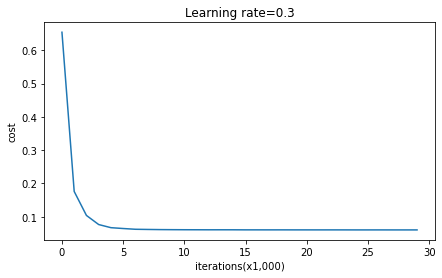

on the training set:
Accuracy: 0.9289099526066351
on the testing set:
Accuracy: 0.95


In [12]:
parameters=model(train_X,train_Y,keep_prob=0.86,learning_rate=0.3)
print('on the training set:')
predict_train=predict(train_X,train_Y,parameters)
print('on the testing set:')
predictions_test=predict(test_X,test_Y,parameters)

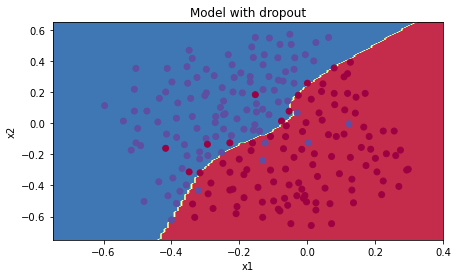

In [13]:
plt.title('Model with dropout')
axes=plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x:predict_dec(parameters,x.T),train_X,train_Y)

In [ ]:
## 3layer NN with dropout is the best ...